This dataset is focused on the real estate market in King County, which is located in the state of Washington, USA, and includes the city of Seattle. It contains information on the prices of homes sold in the area between May 2014 and May 2015, providing a snapshot of the real estate market during that time period.

The dataset includes a variety of variables that can be used to analyze and understand the factors that influence home prices in the area, including the number of bedrooms and bathrooms, the size of the lot, the year the house was built, and the location of the home within the county. With this information, researchers and analysts can explore trends in the real estate market, identify patterns and correlations between different variables, and develop models to predict future home prices in the area.

Overall, the House Sales in King County dataset provides a valuable resource for anyone interested in understanding the real estate market in this region, including real estate professionals, investors, and policymakers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* Omitting the extra and meaningless part of the date column

In [3]:
df['date'] = df.apply(lambda x: x.date[0:8], axis = 1)

# Create columns
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_year'] = df.apply(lambda row: str(row['month']).zfill(2) + '/' + str(row['year']), axis=1)

df['age'] = df['year'] - df['yr_built']

df['age_renovated'] = np.where(df['yr_renovated'] == 0, 0, df['year'] - df['yr_renovated'])

# Drop rows
df = df.drop(df[df['age'] < 0].index)
# Drop columns
df = df.drop(['month', 'year'], axis=1)

df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,age,age_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,10/2014,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12/2014,63,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,02/2015,82,0


# Clean data

* Missing data

In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{} null rate: {}%".format(i, round(null_rate, 2)))

* No columns contain missing values

In [5]:
# Drop duplicates
df.drop_duplicates(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21601 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21601 non-null  int64         
 1   date           21601 non-null  datetime64[ns]
 2   price          21601 non-null  float64       
 3   bedrooms       21601 non-null  int64         
 4   bathrooms      21601 non-null  float64       
 5   sqft_living    21601 non-null  int64         
 6   sqft_lot       21601 non-null  int64         
 7   floors         21601 non-null  float64       
 8   waterfront     21601 non-null  int64         
 9   view           21601 non-null  int64         
 10  condition      21601 non-null  int64         
 11  grade          21601 non-null  int64         
 12  sqft_above     21601 non-null  int64         
 13  sqft_basement  21601 non-null  int64         
 14  yr_built       21601 non-null  int64         
 15  yr_renovated   2160

In [7]:
df['price'] = df['price'].astype(int)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_renovated
count,2.160100e+04,2.160100e+04,21601.000000,21601.000000,21601.000000,2.160100e+04,21601.000000,21601.000000,21601.000000,21601.000000,...,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000
mean,4.579828e+09,5.401295e+05,3.370909,2.114590,2079.835332,1.511319e+04,1.493866,0.007546,0.234341,3.409657,...,291.495533,1970.980695,84.449146,98077.916208,47.560008,-122.213844,1986.674645,12772.457664,43.342438,0.780381
std,2.876324e+09,3.672153e+05,0.929812,0.770069,918.264931,4.143112e+04,0.539673,0.086541,0.766418,0.650852,...,442.599587,29.363254,401.785874,53.502977,0.138582,0.140843,685.490759,27311.041452,29.365068,4.896655
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,-1.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1430.000000,5.042000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571700,-122.230000,1840.000000,7620.000000,40.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069600e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10086.000000,63.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,80.000000


# Visualization

## Number of houses sold over time

Text(0, 0.5, 'Time')

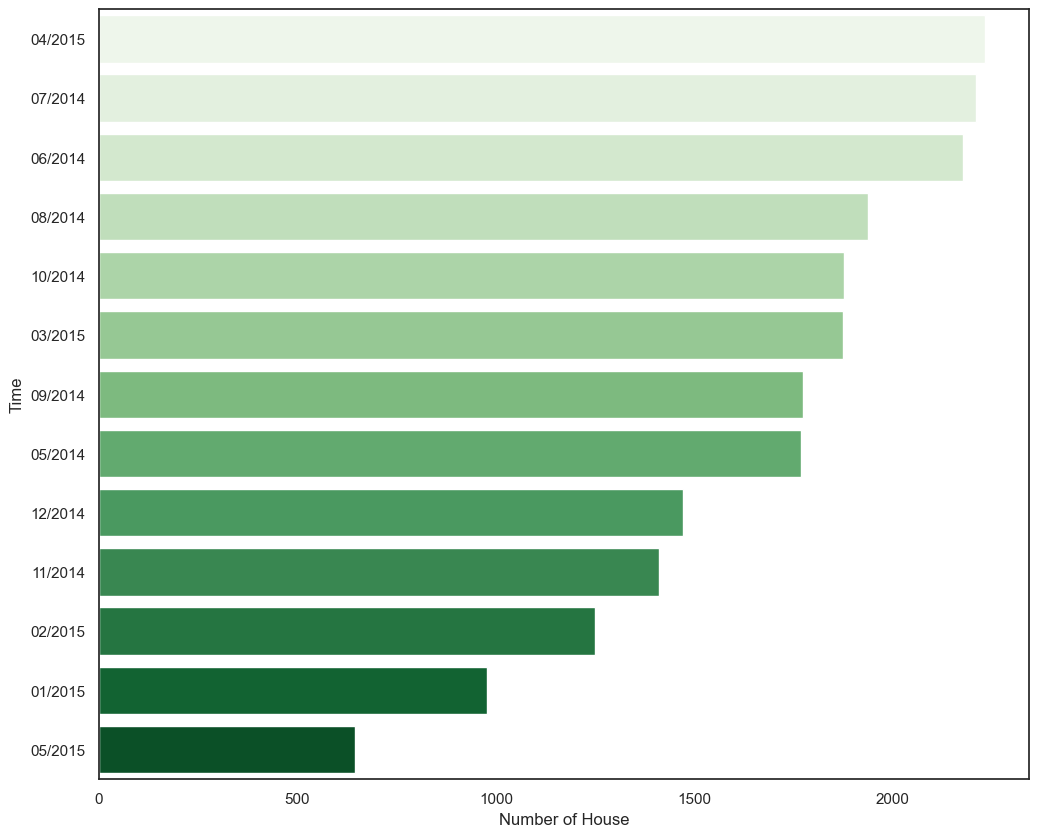

In [8]:
plt.figure(figsize=(12,10))
sns.set(style="white")

# Create countplot
ax = sns.countplot(y="month_year", data=df, palette="Greens", order=df["month_year"].value_counts().index[0:15])

# Set x and y labels
ax.set_xlabel("Number of House")
ax.set_ylabel("Time")

In June 2014 and July 2014, the number of houses sold was over 2000 units per month, decreasing gradually in the last 2 quarters of the year. By April 2015, it skyrocketed to over 2000 units, then dropped sharply in May 2015 (only more than 500 units).

## House price classification

<AxesSubplot: xlabel='price', ylabel='Density'>

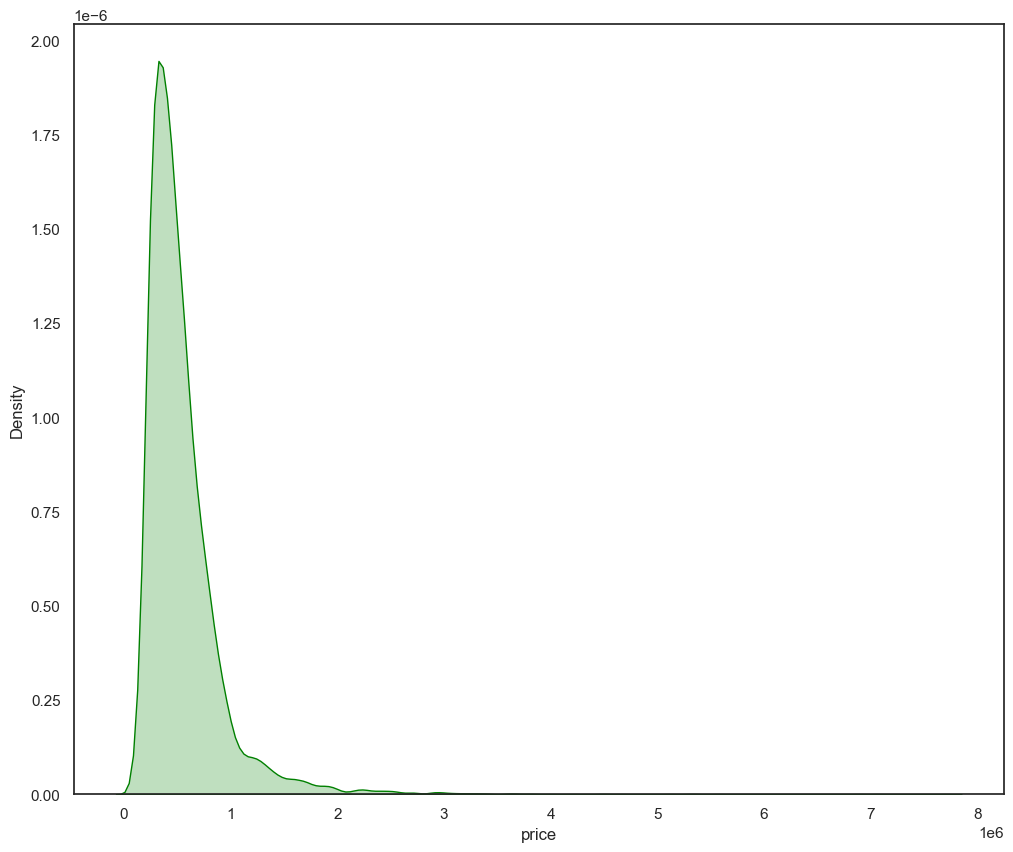

In [9]:
plt.figure(figsize=(12,10))
sns.set(style="white")
sns.kdeplot(data=df['price'], fill=True, color = "Green")

In [10]:
def classify_price(price):
    if price > 2000000:
        return 'Very High'
    elif price >= 1000000:
        return 'High'
    elif price >= 500000:
        return 'Moderate'
    else:
        return "Low"
        
df['price_level'] = df['price'].apply(classify_price)

df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,age,age_renovated,price_level
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,10/2014,59,0,Low
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,12/2014,63,23,Moderate
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,02/2015,82,0,Low


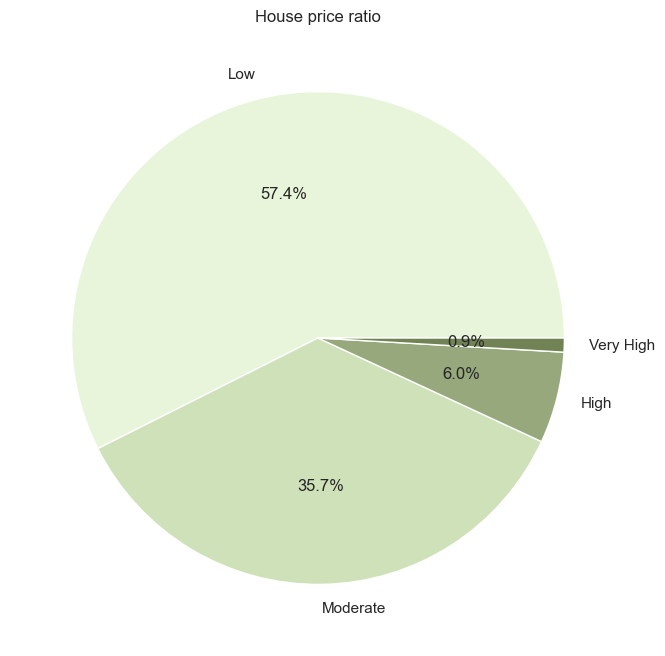

In [11]:
plt.figure(figsize=(8, 8))

colors = ["#E9F5DB", "#CFE1B9", "#97A97C", "#718355"]

counts = df['price_level'].value_counts()
counts.plot.pie(autopct='%1.1f%%', colors = colors)

plt.ylabel(None)
plt.title('House price ratio')

plt.show()

Most of the houses sold have low or medium prices, high and very high prices account for a very low percentage.

## Pearson Correlation Matrix

C:\Users\Asus\AppData\Local\Temp\ipykernel_5976\872781983.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr(method='pearson')


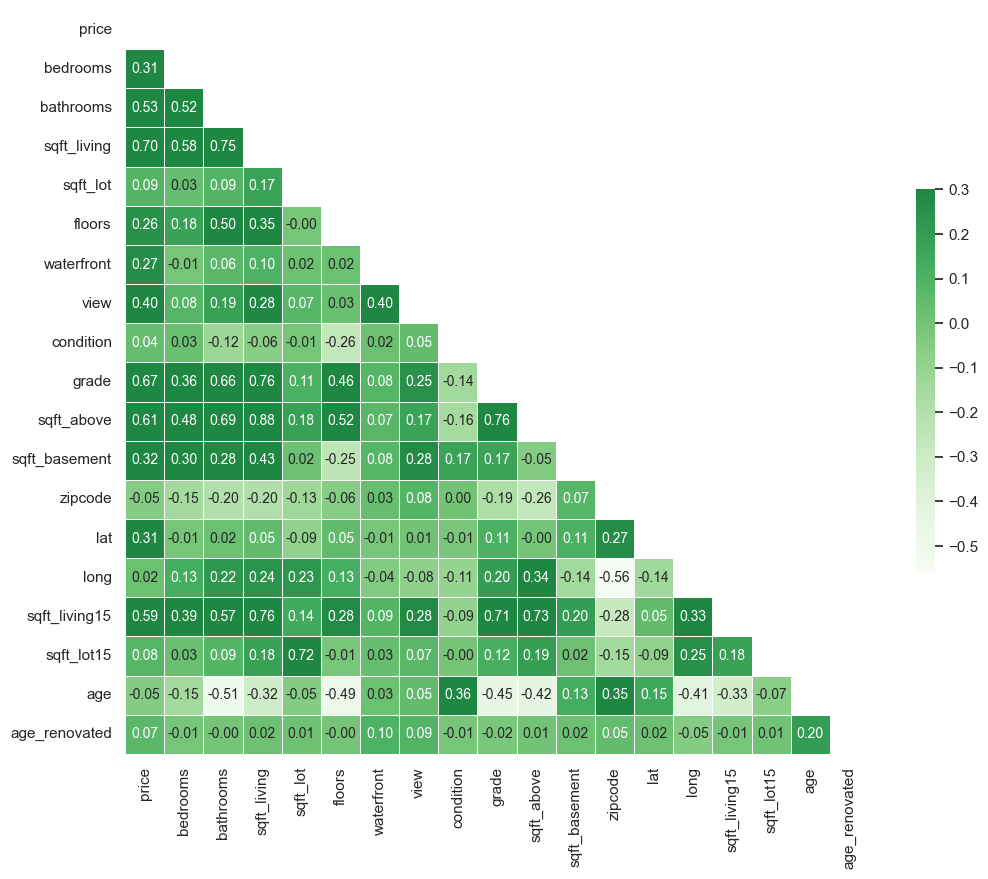

In [12]:
df1 = df.copy()
df1 = df1.drop(columns = ["id", "yr_built", "yr_renovated"])

plt.figure(figsize=(12,10))

corr = df1.corr(method='pearson')

sns.set(style="white")
palette = "Greens"

# Create heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
                 annot=True, fmt=".2f", annot_kws={"size": 10})
plt.show()

Only sqft_living has a relatively strong correlation with price (correlation coefficient = 0.7)

## Sqft_living

In [13]:
corr = df['price'].corr(df['sqft_living'])
print('The correlation coefficient between price and sqft_living is:', corr)

The correlation coefficient between price and sqft_living is: 0.7022871624351583


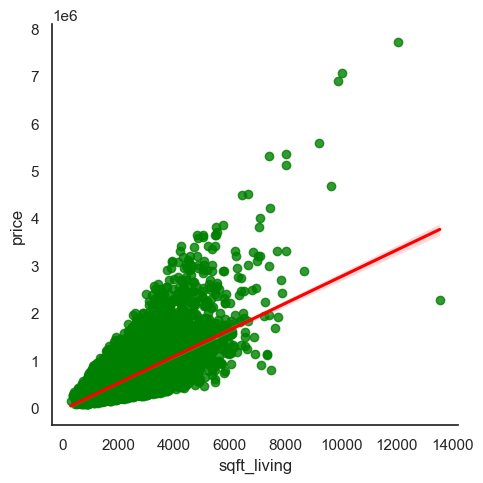

In [14]:
sns.lmplot(data=df, x="sqft_living", y="price", scatter_kws={"color": "green"}, line_kws={"color": "red"})

There is a relatively close correlation between the two variables price and sqft_living

In [15]:
def classify_sqft_living(sqft_living):
    if sqft_living > 6000:
        return 'Very Large'
    elif sqft_living >= 4000:
        return 'Large'
    elif sqft_living >= 2000:
        return 'Moderate'
    else:
        return "Small"
        
df['classify_sqft_living'] = df['sqft_living'].apply(classify_sqft_living)

df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,age,age_renovated,price_level,classify_sqft_living
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,10/2014,59,0,Low,Small
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,12/2014,63,23,Moderate,Moderate
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,02/2015,82,0,Low,Small


Text(0, 0.5, 'Number of House')

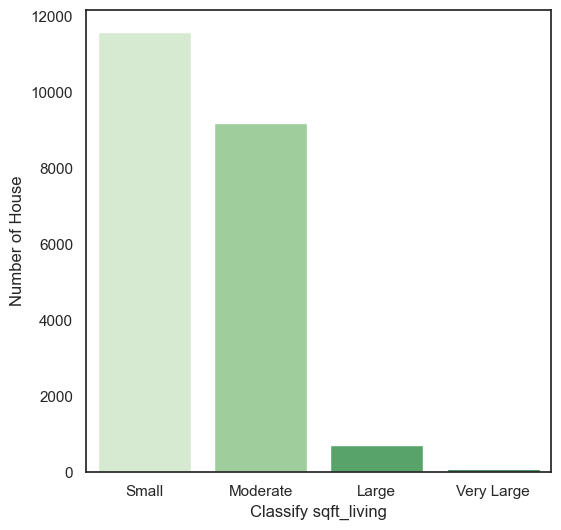

In [16]:
plt.figure(figsize=(6,6))
sns.set(style="white")

#Create countplot
ax = sns.countplot(x="classify_sqft_living", data=df, palette="Greens", order=df["classify_sqft_living"].value_counts().index[0:4])

#Set x and y labels
ax.set_xlabel("Classify sqft_living")
ax.set_ylabel("Number of House")

Houses with small and moderate sqft_living are sold in numbers that outperform other types

## Grade

<AxesSubplot: xlabel='grade', ylabel='price'>

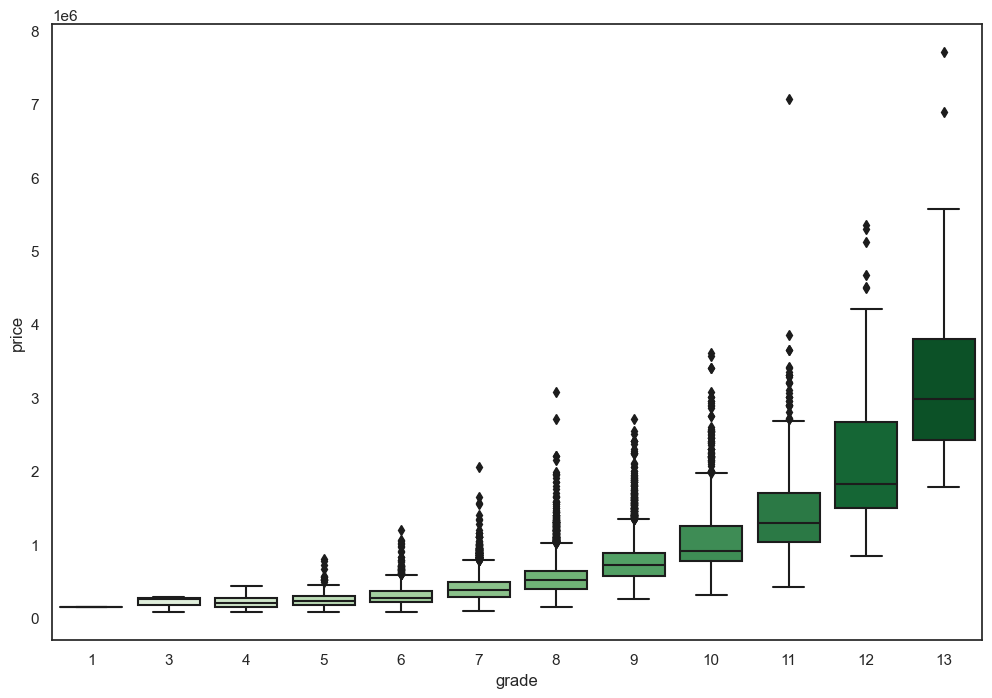

In [17]:
plt.figure(figsize = (12,8))
sns.boxplot(x=df['grade'],y = df['price'], palette = "Greens")

In [18]:
corr = df['price'].corr(df['grade'])
print('The correlation coefficient between price and grade is:', corr)

The correlation coefficient between price and grade is: 0.6677392914369784


A correlation coefficient between grade and price of 0.67 represents a relative correlation between the two variables, but the box plot shows that the average house price increases as the grade of the grade column increases.

## Correlation chart between price and other factors

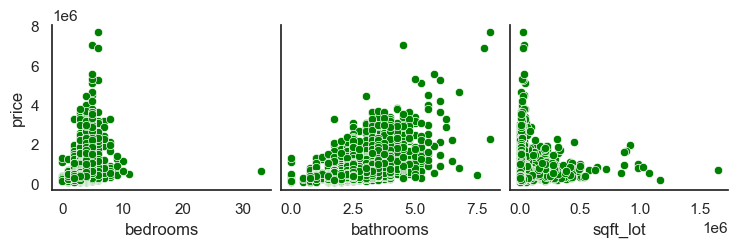

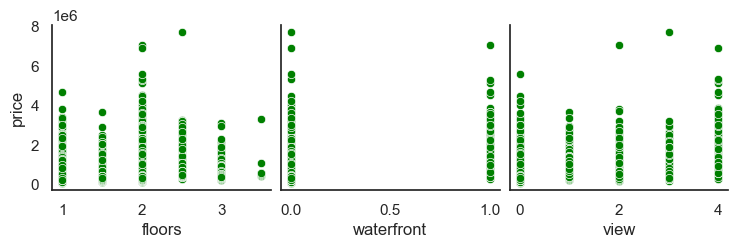

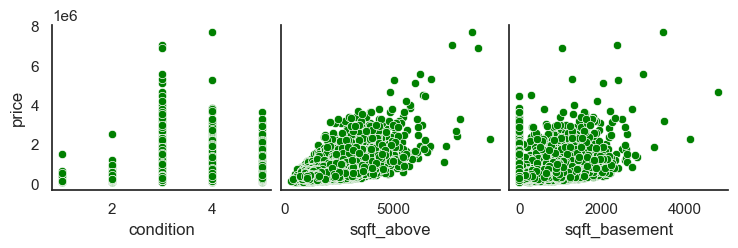

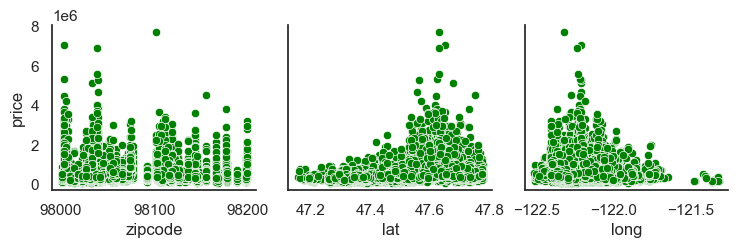

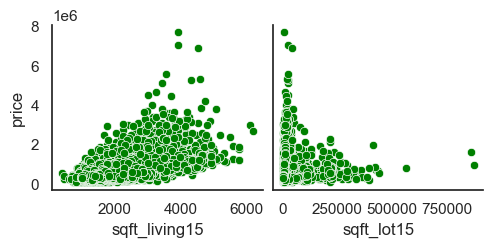

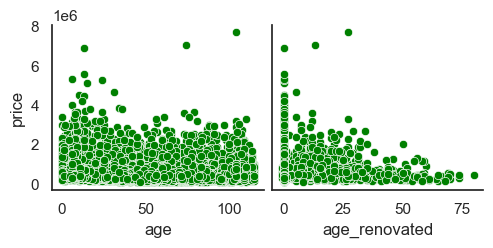

In [19]:
sns.pairplot(
    df,
    x_vars=["bedrooms", "bathrooms", "sqft_lot"],
    y_vars=["price"], plot_kws={"color": "green"}
)

sns.pairplot(
    df,
    x_vars=["floors", "waterfront", "view"],
    y_vars=["price"], plot_kws={"color": "green"}
)

sns.pairplot(
    df,
    x_vars=["condition", "sqft_above", "sqft_basement"],
    y_vars=["price"], plot_kws={"color": "green"}
)

sns.pairplot(
    df,
    x_vars=["zipcode", "lat", "long"],
    y_vars=["price"], plot_kws={"color": "green"}
)

sns.pairplot(
    df,
    x_vars=["sqft_living15", "sqft_lot15"],
    y_vars=["price"], plot_kws={"color": "green"}
)

sns.pairplot(
    df,
    x_vars=["age",  "age_renovated"],
    y_vars=["price"], plot_kws={"color": "green"}
)

<AxesSubplot: xlabel='long', ylabel='lat'>

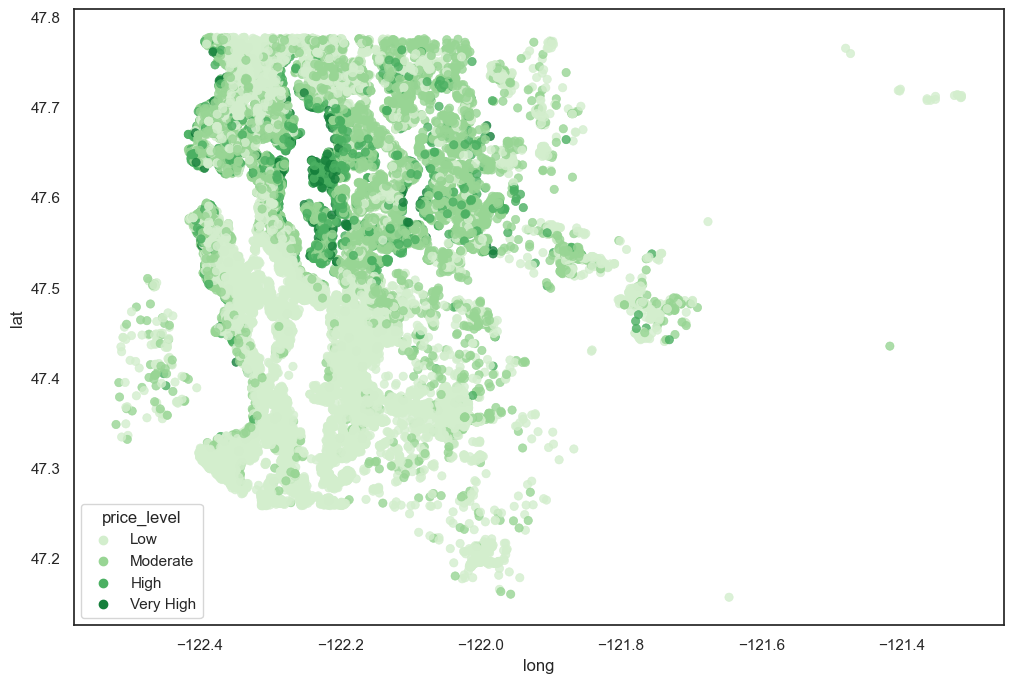

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df['long'], y = df['lat'], hue = df["price_level"], palette = "Greens", edgecolor = None, alpha = 0.8)

## The relative chart between the number of houses sold and several factors

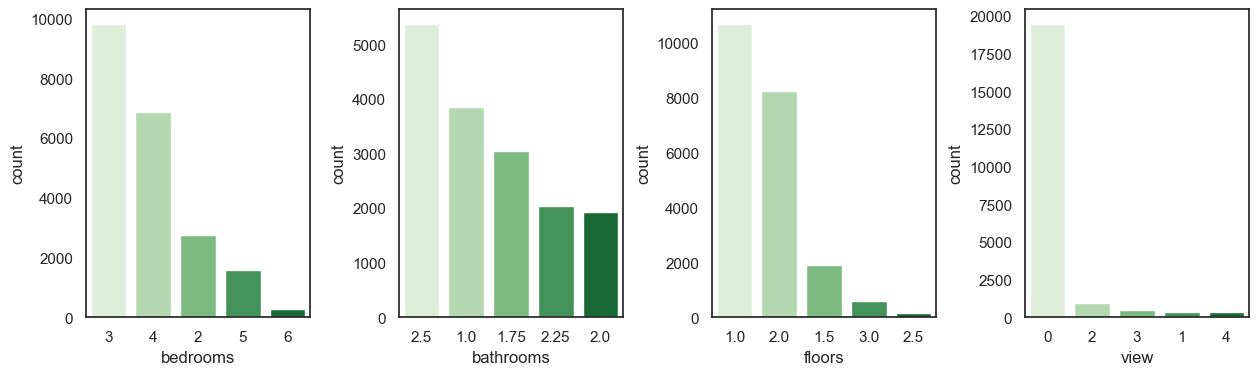

In [21]:
# Create a figure with 3 subplots on the same row
fig, axs = plt.subplots(ncols=4, figsize=(15,4))

# Plot plots
sns.countplot(x="bedrooms", data=df, palette="Greens", order=df["bedrooms"].value_counts().index[0:5], ax=axs[0])
sns.countplot(x="bathrooms", data=df, palette="Greens", order=df["bathrooms"].value_counts().index[0:5], ax=axs[1])
sns.countplot(x="floors", data=df, palette="Greens", order=df["floors"].value_counts().index[0:5], ax=axs[2])
sns.countplot(x="view", data=df, palette="Greens", order=df["view"].value_counts().index[0:5], ax=axs[3])


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

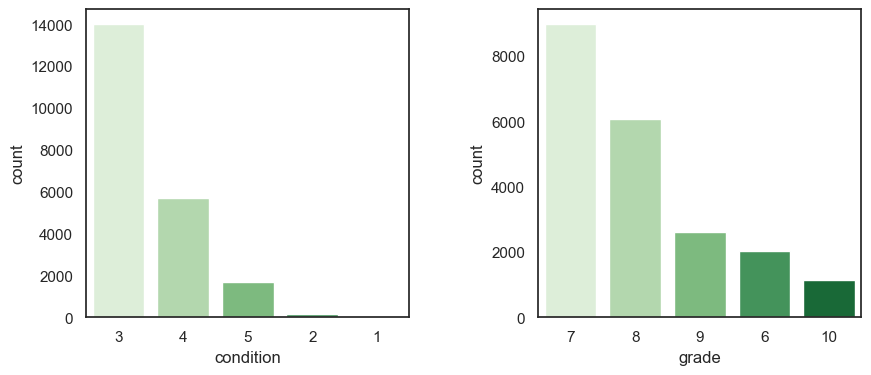

In [22]:
# Create a figure with 3 subplots on the same row
fig, axs = plt.subplots(ncols=2, figsize=(10,4))

# Plot plots
sns.countplot(x="condition", data=df, palette="Greens", order=df["condition"].value_counts().index[0:5], ax=axs[0])
sns.countplot(x="grade", data=df, palette="Greens", order=df["grade"].value_counts().index[0:5], ax=axs[1])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

In [23]:
df["sqft_lot"].value_counts()

5000     358
6000     289
4000     251
7200     220
4800     120
        ... 
25248      1
9934       1
9142       1
24330      1
1076       1
Name: sqft_lot, Length: 9779, dtype: int64

In [24]:
df["sqft_above"].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: sqft_above, Length: 946, dtype: int64

In [25]:
df["sqft_basement"].value_counts()

0      13121
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [26]:
df["sqft_living15"].value_counts()

1540    197
1440    194
1560    192
1500    181
1460    169
       ... 
2054      1
3736      1
4950      1
2728      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [27]:
df["sqft_lot15"].value_counts()

5000     427
4000     357
6000     288
7200     211
4800     144
        ... 
25927      1
35943      1
5107       1
1514       1
2007       1
Name: sqft_lot15, Length: 8688, dtype: int64

In [28]:
df["age"].value_counts()

9      473
8      443
11     433
0      430
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: age, Length: 116, dtype: int64

In [29]:
df["age_renovated"].value_counts()

0     20773
1        45
8        37
11       34
10       31
      ...  
66        1
53        1
60        1
64        1
68        1
Name: age_renovated, Length: 71, dtype: int64

In [30]:
df["waterfront"].value_counts()

0    21438
1      163
Name: waterfront, dtype: int64

In [31]:
df["waterfront"].value_counts() / len(df) *100

0    99.245405
1     0.754595
Name: waterfront, dtype: float64

## Analyze house prices over time and predict future home prices

[Text(0, 0, '2014-10-01T00:00:00.000000000'),
 Text(1, 0, '2014-12-01T00:00:00.000000000'),
 Text(2, 0, '2015-02-01T00:00:00.000000000'),
 Text(3, 0, '2014-05-01T00:00:00.000000000'),
 Text(4, 0, '2014-06-01T00:00:00.000000000'),
 Text(5, 0, '2015-01-01T00:00:00.000000000'),
 Text(6, 0, '2015-04-01T00:00:00.000000000'),
 Text(7, 0, '2015-03-01T00:00:00.000000000'),
 Text(8, 0, '2014-07-01T00:00:00.000000000'),
 Text(9, 0, '2014-08-01T00:00:00.000000000'),
 Text(10, 0, '2014-11-01T00:00:00.000000000'),
 Text(11, 0, '2014-09-01T00:00:00.000000000'),
 Text(12, 0, '2015-05-01T00:00:00.000000000')]

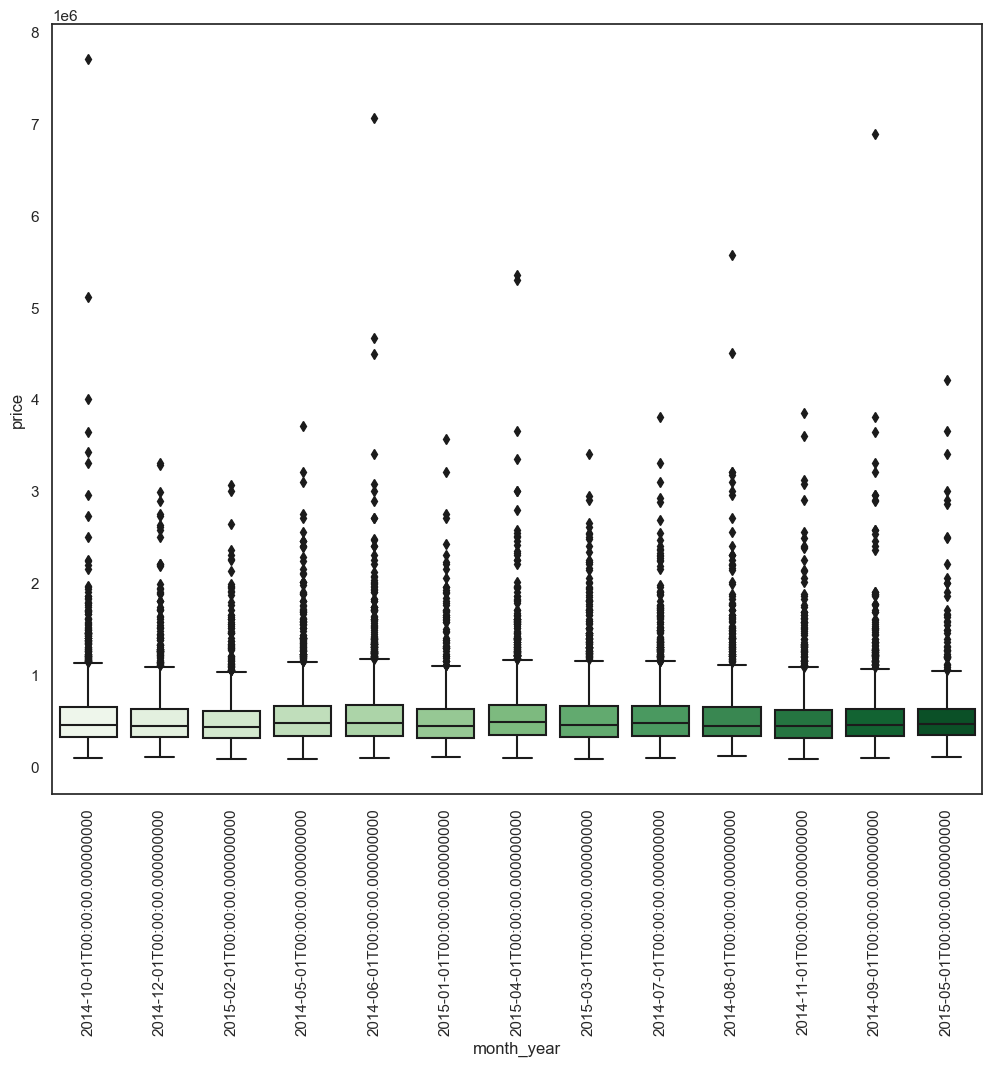

In [32]:
plt.figure(figsize=(12,10))

df['month_year'] = pd.to_datetime(df['month_year'], format='%m/%Y')
ax = sns.boxplot(data=df, x="month_year", y="price", palette = "Greens")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In general, the average house price between months is not much different

In [33]:
from sklearn.linear_model import LinearRegression

# Create dataframe
df2 = pd.DataFrame({
    'timestamp': df['month_year'].apply(lambda x: x.timestamp()),
    'price': df['price']
})

In [34]:
# Create a linear regression model
model = LinearRegression()

# Create feature matrix and result vector
X = df2[['timestamp']]
y = df2['price']

# Train the model on training data
model.fit(X, y)

# Price predictions for future times
future_dates = pd.date_range(start='2015-06-01', end='2016-05-01', freq='MS')
future_timestamps = future_dates.map(lambda x: x.timestamp())
future_prices = model.predict(pd.DataFrame({'timestamp': future_timestamps}))

# Create a DataFrame containing the prediction results
predictions = pd.DataFrame({
    'time': future_dates,
    'price': future_prices
})

print(predictions)

         time          price
0  2015-06-01  537647.432682
1  2015-07-01  537322.910722
2  2015-08-01  536987.571363
3  2015-09-01  536652.232004
4  2015-10-01  536327.710044
5  2015-11-01  535992.370685
6  2015-12-01  535667.848725
7  2016-01-01  535332.509366
8  2016-02-01  534997.170007
9  2016-03-01  534683.465445
10 2016-04-01  534348.126086
11 2016-05-01  534023.604126


It is expected that the average house price in the next 12 months will not change much